In [13]:
#first exercise
import numpy as np
import time

def prod_non_zero_diag_v(x):
    x = np.diag(x)
    x = x[x != 0]
    return np.prod(x)

def prod_non_zero_diag_nv(x):
    p = 1
    for i in range(len(x)):
        for j in range(len(x[i])):
            if(i == j and x[i][j] != 0):
                p *= x[i][j]
    return p

In [57]:
def solve(): 
    time_non_vectorized = []
    data_size = []
    time_vectorized = []
    
    for i in range(20, 27):
        x = np.random.randint(10*i, size=(3*i, 3*i))
        data_size.append(x.size)
        
        start = time.time()
        prod_non_zero_diag_nv(x)
        end = time.time()
        time_non_vectorized.append(end-start)
    
        start = time.time()
        prod_non_zero_diag_v(x)
        end = time.time()
        print(start, end)
        time_vectorized.append(end-start)
        
    return time_non_vectorized, time_vectorized, data_size
    

In [59]:
time_non_vectorized, time_vectorized, data_size = solve()
time_non_vectorized = np.asarray(time_non_vectorized, dtype=np.float64)
data_size = np.asarray(data_size, dtype=np.float64)
time_vectorized = np.asarray(time_vectorized, dtype=np.float64)

[0.00049949 0.00049973 0.00049949 0.00050235 0.         0.
 0.        ]


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in long_scalars
  from ipykernel import kernelapp as app


C:\Users\User\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


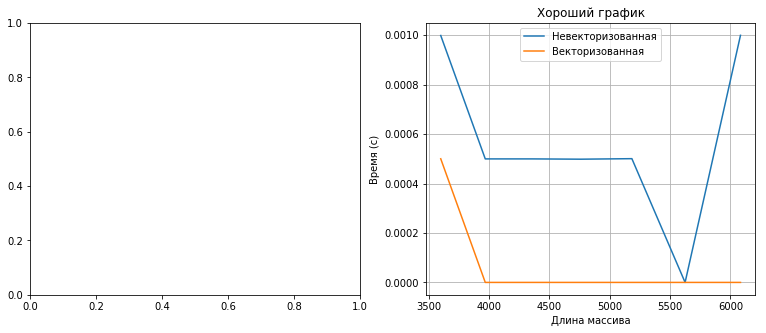

In [53]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5))

ax2.plot(data_size, time_non_vectorized, label=u"Невекторизованная")
ax2.plot(data_size, time_vectorized, label=u"Векторизованная")
ax2.set_title(u"Хороший график")
ax2.set_xlabel(u"Длина массива")
ax2.set_ylabel(u"Время (с)")
ax2.grid()
ax2.legend()

f.show()       
